In [1]:
import pandas as pd

In [2]:
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Compile all the reviews into one giant string
reviews = ""
for ind in range(1000):
    reviews = reviews + " " + imdb_df["review"][ind]
    
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(reviews.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

In [7]:
df

,wordlist,wordfreq
0,br,4124
1,'s,2349
2,movie,2056
3,film,1770
4,``,1285
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [8]:
# Purge weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [9]:
# Mean
df['wordfreq'].mean()

6.501919022649873

In [10]:
# Median
df['wordfreq'].median()

1.0

In [11]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

<AxesSubplot:ylabel='wordlist'>

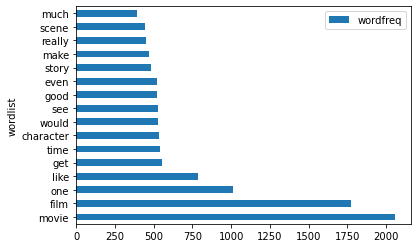

In [12]:
# Barchart
bar_df = df.loc[0:20, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")
#ax = bar_df.plot.bar(x='wordlist', y='wordfreq', rot=0)

<AxesSubplot:ylabel='wordlist'>

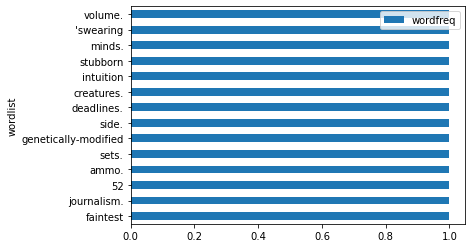

In [15]:
# Barchart
bar_df = df.loc[18490:, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")

In [ ]:
# Look only at the first 1000 positive reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "positive":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

In [ ]:
df

In [ ]:
# Clean up the dataframe and remove weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=7)
df

In [ ]:
# Barchart
bar_df = df.loc[0:50, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

In [ ]:
# Look only at the negative reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "negative":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

In [ ]:
df

In [ ]:
# Clean up dataframe and drop weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df

In [ ]:
# Barchart
bar_df = df.loc[0:30, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)